<p style="font-weight:bold;font-size:200%">Events and Insider Tradings</p>

- Author: Yichen Luo
- Date: 2022-08-13

In [1085]:
import time
import random
import numpy as np
import pandas as pd
from datetime import timezone
import datetime
import tweepy
import requests
import configparser
import matplotlib.pyplot as plt
import re
import os
from bs4 import BeautifulSoup
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'

# Native-Token-Related

In [305]:
df = pd.read_csv(f'{RES}/insider_trading/root/teamwallet_insider.csv')
total_txn = df.shape[0]
total_amount = df['amountUSD'].sum()
df

/tmp/ipykernel_3263042/4241646816.py:1: DtypeWarning: Columns (3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{RES}/insider_trading/root/teamwallet_insider.csv')


,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract
0,0x3bf474e8fa69c27549073765b34dde30a30a6ca98595fa83f51192f43c8586cb#369426,1.198016e+06,6,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xe592427a0aece92de3edee1f18e0157c05861564,1653320999381348173678892919116746,198929.0,2021-07-26 01:39:18,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3bf474e8fa69c27549073765b34dde30a30a6ca98595fa83f51192f43c8586cb,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,1.197772e+06,0.000000e+00,0.000000e+00,521.000000,NaN,NaN,False
1,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947#11201,1.313451e+03,142,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xe592427a0aece92de3edee1f18e0157c05861564,1739360052492861393024856,-214543.0,2021-11-01 01:56:12,Dogelon,Wrapped Ether,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,6.300000e+08,0.000000e+00,0.000000e+00,0.304507,NaN,NaN,False
2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947#833859,1.312287e+03,141,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x610a94f64d1d149623369e5bac9576065d23893b,0xe592427a0aece92de3edee1f18e0157c05861564,1207715477751701179052131841673446,192647.0,2021-11-01 01:56:12,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,0.000000e+00,1.311124e+03,3.045070e-01,0.000000,NaN,NaN,False
3,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4#1009028,2.162294e+03,700,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,3437151724244765900381421,-200919.0,2022-05-12 21:41:30,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,0.000000e+00,1.151991e+00,2.167361e+03,0.000000,NaN,NaN,False
4,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4#60801,2.157227e+03,697,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1228873597918384533902084,-221491.0,2022-05-12 21:41:30,Dogelon,Wrapped Ether,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,0.000000e+00,4.822255e+09,1.151991e+00,0.000000,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107397,0xefb3203c00a0e55d001c2f5aeaaec31cb5cfa0663b4d82eb18f414c74b075741-0,4.752094e+01,605,NaN,NaN,0x1b02da8cb0d097eb8d57a175b88c7d8b47997506,NaN,NaN,2022-01-30 22:22:32,Wrapped Matic,(PoS) Tether USD,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0xc2132d05d31c914a87c6611c10748aeb04b58e8f,0xefb3203c00a0e55d001c2f5aeaaec31cb5cfa0663b4d82eb18f414c74b075741,0x5a6dc942826807539ca19d21c132e4b004075

## Native-Token-Related Transactions to Total Insider Transactions

In [306]:
dfn = df.loc[(df['insider_tokenName'] == df['token0_name'])|
           (df['insider_tokenName'] == df['token1_name'])|
           (df['insider_contractAddress'] == df['token0_id'])|
           (df['insider_contractAddress'] == df['token1_id'])
            ]
dfn
native_tnx = dfn.shape[0]
native_amount = dfn['amountUSD'].sum()
ratio1 = native_tnx/total_txn
ratio2 = native_amount/total_amount

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract
92,0xe91b835550a1a50b26a0646fa3e1def942a78ea5ce7349529a30700eff08ab11#33823,209.294150,266,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,0xe592427a0aece92de3edee1f18e0157c05861564,9400732126353364784919992,-180796.0,2021-11-22 02:43:11,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe91b835550a1a50b26a0646fa3e1def942a78ea5ce7349529a30700eff08ab11,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,Tiger King,TKING,0x24e89bdf2f65326b94e36978a7edeac63623dafa,uniswapv3_ethereum,ethereum,3.541485e+06,0.000000,0.000000e+00,0.050000,NaN,NaN,False
155,0xd1644c62998cbb5fa03b412ab9c62cd560706e04d2399fd86860fcd10159c499#4,439.630640,100,0x240bf95c3df6fc0206028a073555e251aa67458b,0x240bf95c3df6fc0206028a073555e251aa67458b,0xe592427a0aece92de3edee1f18e0157c05861564,792833476219372735929747753,-92095.0,2021-09-07 22:15:51,TRIBE,Wrapped Ether,0x4ffcad848248d4931374336fcaccf263638413ae,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd1644c62998cbb5fa03b412ab9c62cd560706e04d2399fd86860fcd10159c499,0x240bf95c3df6fc0206028a073555e251aa67458b,TRIBE,TRIBE,0x4ffcad848248d4931374336fcaccf263638413ae,uniswapv3_ethereum,ethereum,1.294447e+03,0.000000,0.000000e+00,0.130000,NaN,NaN,False
194,0x099a3083fd9a904646021f522bef9d887e6ab07b5171a59ca278c4edce13c43b#546,325.499103,282,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,108654985078874190449425007,-131845.0,2021-08-17 22:21:44,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x099a3083fd9a904646021f522bef9d887e6ab07b5171a59ca278c4edce13c43b,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,170035.300000,3.254991e+02,0.000000,NaN,NaN,False
211,0x2f9ee0617b0024f000eda6cef85507776e2b7d2f2f637858764eb2c652f6c40e#619,235.663410,133,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,80395462705354980614036351,-137870.0,2021-09-11 23:57:32,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x2f9ee0617b0024f000eda6cef85507776e2b7d2f2f637858764eb2c652f6c40e,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,224977.000000,2.356634e+02,0.000000,NaN,NaN,False
216,0x8e7be63d557448574c91c0ff62e26339473a08906565e79a034db46ac67dea95#378,1067.164913,369,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,131061056549767839461752140,-128095.0,2021-08-02 14:29:56,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x8e7be63d557448574c91c0ff62e26339473a08906565e79a034db46ac67dea95,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,359218.340216,1.067165e+03,0.000000,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107395,0x414080e642bc27ba3c910eba99e0612576b242a459bca9c8d516785d2d684edd-1,677.278483,399,NaN,NaN,0x1b02da8cb0d097eb8d57a175b88c7d8b47997506,NaN,NaN,2022-01-16 17:52:40,USD Coin (PoS),$KMC,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,0x44d09156c7b4acf0c64459fbcced7613f5519918,0x414080e642bc27ba3c910eba99e0612576b242a459bca9c8d516785d2d684edd,0x5ef3d7a2583baec961be19302c604c7f914138be,$KMC,$KMC,0x44d09156c

In [307]:
for idx, row in dfn.iterrows():
    dex = row['dex']
    index = row['id']
    
    token0_name = row['token0_name']
    token1_name = row['token1_name']
    insider_tokenName = row['insider_tokenName']
    
    insider_contractAddress = row['insider_contractAddress']
    token0_id = row['token0_id']
    token1_id = row['token1_id']
    
    amount0Out = row['amount0Out']
    amount0In = row['amount0In']
    amount1Out = row['amount1Out']
    amount1In = row['amount1In']
    amountUSD = row['amountUSD']
    
    if (insider_tokenName == token0_name)|(insider_contractAddress == token0_id):
        if (amount0In == 0)|(amount1Out == 0):
            dfn.loc[df['id'] == index, 'buy'] = amountUSD
        else:
            dfn.loc[df['id'] == index, 'buy'] = - amountUSD
            
    else:
        if (amount0In == 0)|(amount1Out == 0):
            dfn.loc[df['id'] == index, 'buy'] = - amountUSD
        else:
            dfn.loc[df['id'] == index, 'buy'] = amountUSD
            
dfn

/tmp/ipykernel_3263042/1400451570.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn.loc[df['id'] == index, 'buy'] = amountUSD


,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy
92,0xe91b835550a1a50b26a0646fa3e1def942a78ea5ce7349529a30700eff08ab11#33823,209.294150,266,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,0xe592427a0aece92de3edee1f18e0157c05861564,9400732126353364784919992,-180796.0,2021-11-22 02:43:11,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe91b835550a1a50b26a0646fa3e1def942a78ea5ce7349529a30700eff08ab11,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,Tiger King,TKING,0x24e89bdf2f65326b94e36978a7edeac63623dafa,uniswapv3_ethereum,ethereum,3.541485e+06,0.000000,0.000000e+00,0.050000,NaN,NaN,False,209.294150
155,0xd1644c62998cbb5fa03b412ab9c62cd560706e04d2399fd86860fcd10159c499#4,439.630640,100,0x240bf95c3df6fc0206028a073555e251aa67458b,0x240bf95c3df6fc0206028a073555e251aa67458b,0xe592427a0aece92de3edee1f18e0157c05861564,792833476219372735929747753,-92095.0,2021-09-07 22:15:51,TRIBE,Wrapped Ether,0x4ffcad848248d4931374336fcaccf263638413ae,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd1644c62998cbb5fa03b412ab9c62cd560706e04d2399fd86860fcd10159c499,0x240bf95c3df6fc0206028a073555e251aa67458b,TRIBE,TRIBE,0x4ffcad848248d4931374336fcaccf263638413ae,uniswapv3_ethereum,ethereum,1.294447e+03,0.000000,0.000000e+00,0.130000,NaN,NaN,False,439.630640
194,0x099a3083fd9a904646021f522bef9d887e6ab07b5171a59ca278c4edce13c43b#546,325.499103,282,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,108654985078874190449425007,-131845.0,2021-08-17 22:21:44,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x099a3083fd9a904646021f522bef9d887e6ab07b5171a59ca278c4edce13c43b,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,170035.300000,3.254991e+02,0.000000,NaN,NaN,False,-325.499103
211,0x2f9ee0617b0024f000eda6cef85507776e2b7d2f2f637858764eb2c652f6c40e#619,235.663410,133,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,80395462705354980614036351,-137870.0,2021-09-11 23:57:32,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x2f9ee0617b0024f000eda6cef85507776e2b7d2f2f637858764eb2c652f6c40e,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,224977.000000,2.356634e+02,0.000000,NaN,NaN,False,-235.663410
216,0x8e7be63d557448574c91c0ff62e26339473a08906565e79a034db46ac67dea95#378,1067.164913,369,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,131061056549767839461752140,-128095.0,2021-08-02 14:29:56,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x8e7be63d557448574c91c0ff62e26339473a08906565e79a034db46ac67dea95,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,359218.340216,1.067165e+03,0.000000,NaN,NaN,False,-1067.164913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107395,0x414080e642bc27ba3c910eba99e0612576b242a459bca9c8d516785d2d684edd-1,677.278483,399,NaN,NaN,0x1b02da8cb0d097eb8d57a175b88c7d8b47997506,NaN,NaN,2022-01-16 17:52:40,USD Coin (PoS),$KMC,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,0x44d09156c7b4acf0c64459fbcced7613f5519918,0x414080e642bc27ba3c910eba99e0612576b242a459bca9c8d516785d2d684e

In [308]:
dfn.to_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn.csv', index=False)

### Number Ratio

In [296]:
ratio1

0.1527904508295935

### Amount Ratio

In [297]:
ratio2   #stable coin still has a high wight.

0.1085948698300503

### Project Number

In [298]:
dfn['insider_tokenSymbol'].nunique()
dfn['insider_tokenName'].nunique()
dfn['insider_contractAddress'].nunique()

2591

2710

2797

## Absolute Ranking

### Amount

In [299]:
dfn.groupby(['insider_tokenSymbol'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)
symbol = dfn.groupby(['insider_tokenSymbol'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)['insider_tokenSymbol'].values
dfn.loc[[True if i in symbol else False for i in dfn['insider_tokenSymbol']],
        ['insider_tokenName', 'insider_tokenSymbol', 'chain', 'insider_contractAddress']].drop_duplicates('insider_tokenSymbol')

,insider_tokenSymbol,amountUSD
854,FLOKI,5.136402e+06
1172,KIBA,2.466293e+06
1712,PORN,1.904367e+06
308,BINU,1.762001e+06
1763,QOM,1.121757e+06
2384,UNIV,1.071953e+06
1530,Mononoke-Inu,1.051487e+06
2356,TheCitadel,9.410231e+05
755,EPRO,8.882790e+05
578,CVC,8.612251e+05


,insider_tokenName,insider_tokenSymbol,chain,insider_contractAddress
1008,Shiba Predator,QOM,ethereum,0xa71d0588eaf47f12b13cf8ec750430d21df04974
9520,FLOKI,FLOKI,ethereum,0x43f11c02439e2736800433b4594994bd43cd066d
9617,The Citadel,TheCitadel,ethereum,0x849ba2278cdae7fa7006c0661fea1c35d5af3336
10245,BullyInu,BINU,ethereum,0x55d1d16fb42fce47b899010c996a3a31f6db8fd6
33133,Ethereum Pro,EPRO,ethereum,0xAB6E163cBEB3959b68b90beC722F5a9EEf82bA72
34309,Mononoke Inu,Mononoke-Inu,ethereum,0x4da08a1Bff50BE96bdeD5C7019227164b49C2bFc
34580,Kiba Inu,KIBA,ethereum,0x4B2C54b80B77580dc02A0f6734d3BAD733F50900
37029,Porn DAO,PORN,ethereum,0x0000000035f26e72B70552b92bF7e02f67A90549
39470,CoinViewCap,CVC,ethereum,0x22b59a7387F7D25fe2b1c692Ee825e1802E6E3d5
92691,Universe,UNIV,avalanche,0x959b88966fC5B261dF8359961357d34F4ee27b4a


### Transaction Number

In [300]:
dfn.groupby(['insider_tokenSymbol'])['id'].count().reset_index().sort_values('id', ascending=False).head(10)

,insider_tokenSymbol,id
2384,UNIV,428
33,$KMC,357
466,CBK,261
1615,OCCT,259
308,BINU,227
1844,RUGPULL,219
1172,KIBA,204
261,BATMAN,203
554,CRIME,200
1712,PORN,184


## Cumulative Frequency Diagram

### Amount

Text(0.5, 1.0, 'Cumulative Distribution Diagram of Dollar Amount')

Text(0.5, 0, 'Percentage of Cumulative Project Number Sorted by Dollar Amount')

Text(0, 0.5, 'Percentage of Cumulative Dollar Amount')

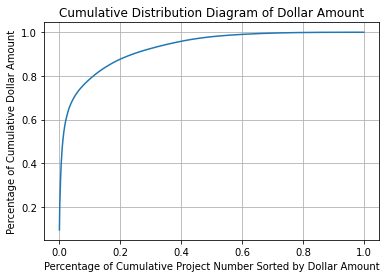

In [301]:
dfc = dfn.groupby(['insider_tokenSymbol'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False)
dfc.reset_index(drop=True, inplace=True)
dfc.reset_index(inplace=True)
dfc.rename(columns={'index':'ranking'}, inplace=True)

dfc['ranking'] = dfc['ranking'] + 1
dfc['Percentage of Cumulative Project Number'] = dfc['ranking'] / dfc['ranking'].max()

dfc['Cumulative Dollar Amount'] = dfc['amountUSD'].cumsum()
dfc['Percentage of Cumulative Dollar Amount'] = dfc['Cumulative Dollar Amount'] / dfc['Cumulative Dollar Amount'].max()

fig, ax = plt.subplots()

ax.plot(dfc['Percentage of Cumulative Project Number'].values, dfc['Percentage of Cumulative Dollar Amount'].values)
ax.set_title('Cumulative Distribution Diagram of Dollar Amount')
ax.set_xlabel('Percentage of Cumulative Project Number Sorted by Dollar Amount')
ax.set_ylabel('Percentage of Cumulative Dollar Amount')

plt.grid()
plt.show()

### Number

Text(0.5, 1.0, 'Cumulative Distribution Diagram of Transaction Number')

Text(0.5, 0, 'Percentage of Cumulative Project Number Sorted by Transaction Number')

Text(0, 0.5, 'Percentage of Cumulative Transaction Number')

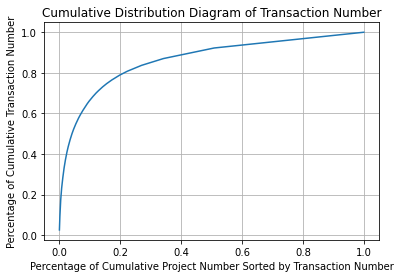

In [302]:
dfc = dfn.groupby(['insider_tokenSymbol'])['id'].count().reset_index().sort_values('id', ascending=False)
dfc.reset_index(drop=True, inplace=True)
dfc.reset_index(inplace=True)
dfc.rename(columns={'index':'ranking'}, inplace=True)

dfc['ranking'] = dfc['ranking'] + 1
dfc['Percentage of Cumulative Project Number'] = dfc['ranking'] / dfc['ranking'].max()

dfc['Cumulative Transaction Number'] = dfc['id'].cumsum()
dfc['Percentage of Cumulative Transaction Number'] = dfc['Cumulative Transaction Number'] / dfc['Cumulative Transaction Number'].max()

fig, ax = plt.subplots()

ax.plot(dfc['Percentage of Cumulative Project Number'].values, dfc['Percentage of Cumulative Transaction Number'].values)
ax.set_title('Cumulative Distribution Diagram of Transaction Number')
ax.set_xlabel('Percentage of Cumulative Project Number Sorted by Transaction Number')
ax.set_ylabel('Percentage of Cumulative Transaction Number')

plt.grid()
plt.show()

# Tweepy and Block Exploer

## Config

In [303]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

['config.ini']

In [1113]:
df = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn.csv')
dfn = df.loc[(df['insider_tokenName'] == df['token0_name'])|
           (df['insider_tokenName'] == df['token1_name'])|
           (df['insider_contractAddress'] == df['token0_id'])|
           (df['insider_contractAddress'] == df['token1_id'])
            ]
dfn['timestamp'] = pd.to_datetime(dfn['timestamp']).dt.tz_localize("UTC")
dfn

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy
0,0xe91b835550a1a50b26a0646fa3e1def942a78ea5ce7349529a30700eff08ab11#33823,209.294150,266,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,0xe592427a0aece92de3edee1f18e0157c05861564,9400732126353364784919992,-180796.0,2021-11-22 02:43:11+00:00,Tiger King,Wrapped Ether,0x24e89bdf2f65326b94e36978a7edeac63623dafa,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe91b835550a1a50b26a0646fa3e1def942a78ea5ce7349529a30700eff08ab11,0x008295a98dcd428b680bc1db7a743f1d3993b4d4,Tiger King,TKING,0x24e89bdf2f65326b94e36978a7edeac63623dafa,uniswapv3_ethereum,ethereum,3.541485e+06,0.000000,0.000000e+00,0.050000,NaN,NaN,False,209.294150
1,0xd1644c62998cbb5fa03b412ab9c62cd560706e04d2399fd86860fcd10159c499#4,439.630640,100,0x240bf95c3df6fc0206028a073555e251aa67458b,0x240bf95c3df6fc0206028a073555e251aa67458b,0xe592427a0aece92de3edee1f18e0157c05861564,792833476219372735929747753,-92095.0,2021-09-07 22:15:51+00:00,TRIBE,Wrapped Ether,0x4ffcad848248d4931374336fcaccf263638413ae,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd1644c62998cbb5fa03b412ab9c62cd560706e04d2399fd86860fcd10159c499,0x240bf95c3df6fc0206028a073555e251aa67458b,TRIBE,TRIBE,0x4ffcad848248d4931374336fcaccf263638413ae,uniswapv3_ethereum,ethereum,1.294447e+03,0.000000,0.000000e+00,0.130000,NaN,NaN,False,439.630640
2,0x099a3083fd9a904646021f522bef9d887e6ab07b5171a59ca278c4edce13c43b#546,325.499103,282,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,108654985078874190449425007,-131845.0,2021-08-17 22:21:44+00:00,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x099a3083fd9a904646021f522bef9d887e6ab07b5171a59ca278c4edce13c43b,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,170035.300000,3.254991e+02,0.000000,NaN,NaN,False,-325.499103
3,0x2f9ee0617b0024f000eda6cef85507776e2b7d2f2f637858764eb2c652f6c40e#619,235.663410,133,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,80395462705354980614036351,-137870.0,2021-09-11 23:57:32+00:00,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x2f9ee0617b0024f000eda6cef85507776e2b7d2f2f637858764eb2c652f6c40e,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,224977.000000,2.356634e+02,0.000000,NaN,NaN,False,-235.663410
4,0x8e7be63d557448574c91c0ff62e26339473a08906565e79a034db46ac67dea95#378,1067.164913,369,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,0xe592427a0aece92de3edee1f18e0157c05861564,131061056549767839461752140,-128095.0,2021-08-02 14:29:56+00:00,INCH TOKEN,USD Coin,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x8e7be63d557448574c91c0ff62e26339473a08906565e79a034db46ac67dea95,0xd42b6798e0ea3c455aa31a15e8e582439154e5cc,INCH TOKEN,INCH,0x6339bd92eaa3cb8e629b06449e08b90581a33cea,uniswapv3_ethereum,ethereum,0.000000e+00,359218.340216,1.067165e+03,0.000000,NaN,NaN,False,-1067.164913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,0x414080e642bc27ba3c910eba99e0612576b242a459bca9c8d516785d2d684edd-1,677.278483,399,NaN,NaN,0x1b02da8cb0d097eb8d57a175b88c7d8b47997506,NaN,NaN,2022-01-16 17:52:40+00:00,USD Coin (PoS),$KMC,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,0x44d09156c7b4acf0c64459fbcced7613f5519918,0x414080e642bc27ba3c910eba99e0612576b2

In [1130]:
tokenName = 'Winry Inu'
tokenSymbol = 'WINRY'

users = api.search_users(tokenName)
timestamp = []
text = []
iter_num = 0

while True:
    iter_num += 1
    if iter_num == 1:
        tweets = api.user_timeline(user_id=users[0].id, 
                               # 200 is the maximum allowed count
                               count=200,
                               exclude_replies = True,
                               include_rts = False,
                               # Necessary to keep full_text 
                               # otherwise only the first 140 words are extracted
                               tweet_mode = 'extended'
                           )
    else:
        tweets = api.user_timeline(user_id=users[0].id, 
                                   # 200 is the maximum allowed count
                                   count=200,
                                   exclude_replies = True,
                                   include_rts = False,
                                   max_id = oldest_id - 1,
                                   # Necessary to keep full_text 
                                   # otherwise only the first 140 words are extracted
                                   tweet_mode = 'extended'
                               )
    if len(tweets) == 0: break
    
    for tweet in tweets:
        timestamp.append(tweet.created_at)
        text.append(tweet.full_text)
    
    oldest_id = tweets[-1].id
    print(f'the number of tweets: {len(tweets)}')

the number of tweets: 26
the number of tweets: 43
the number of tweets: 38
the number of tweets: 58


In [1135]:
dft = pd.DataFrame({'timestamp':timestamp, 'text':text})

dft['timestamp'] = pd.to_datetime(dft['timestamp'])

start = dfn.loc[dfn['insider_tokenSymbol'] == tokenSymbol, 'timestamp'].min() - datetime.timedelta(days=3)
end = dfn.loc[dfn['insider_tokenSymbol'] == tokenSymbol, 'timestamp'].max() + datetime.timedelta(days=3)

dft = dft.loc[(dft['timestamp'] >= start)&(dft['timestamp'] <= end)]

dft['text'] = dft['text'].apply(lambda x: x.lower())
dft

,timestamp,text
0,2022-08-15 10:33:29+00:00,hey #winryinu and #animetaworld investors. ❤️\n\nif you are active on twitter and want to suppor...
1,2022-08-13 14:47:22+00:00,#animetaworld nft event‼️\n\neveryone who will buy our #animetaworld nfts receive $winry totally...
2,2022-08-13 11:56:09+00:00,hello @everyone \n\nwe have #winryinu tokens and our #animetaworld nfts for you \nfor free ❗️ \n...
3,2022-08-09 14:22:12+00:00,don't forget about our #animetaworld #nft event!!!\n\nwe have here huge prizes for you.\n\nall w...
4,2022-08-04 11:23:14+00:00,"i see, you are all very bearish in our community.\n\nit is your decision and your consequences. ..."
...,...,...
160,2021-12-03 00:16:39+00:00,the dead wallet is now #2 on the winry holders list. 75quadrillion+ has now been burned🔥🔥🔥check ...
161,2021-12-02 13:39:07+00:00,36 quadrillion have been burned in the past 2 days. the dead wallet is now #4 on the top holders...
162,2021-12-01 23:02:12+00:00,the project is not pulled. the liquidity pool is locked. price action is still happening. this i...
163,2021-12-01 13:13:52+00:00,burns are happening 🔥🔥🔥🔥 https://t.co/gab51pqkan


In [1136]:
dft = dft.loc[[True if re.search('listing', i) else False for i in dft['text']]]
dft
events = dft['timestamp'].unique()
final = []

for event in events:
    txn = []
    for idx, row in dfn.loc[dfn['insider_tokenSymbol'] == tokenSymbol].iterrows():
        index = row['id']
        if (row['timestamp'] >= (event - datetime.timedelta(days=3))) & ((row['timestamp']) <= (event + datetime.timedelta(days=3))):
            txn.append(dfn.loc[dfn['id'] == index])
            
    if len(txn) != 0:
        txn = pd.concat(txn)
        txn['event'] = event
        txn['time_delta'] = txn['timestamp'] - txn['event']
        final.append(txn)

if len(final)!= 0: final = pd.concat(final)
# final
    

,timestamp,text
43,2022-04-27 10:44:05+00:00,our daily volume tripled recently and it is currently around\n 1 000 000 usd‼️\n\nit is a great ...
149,2021-12-16 03:22:08+00:00,hotbit post is out about the winry inu listing december 17th. check the link https://t.co/siqwvf...
150,2021-12-15 04:41:07+00:00,new exchange listings coming. hotbit is first going live friday.💥💥


In [1133]:
dft['timestamp'].unique()
dft.loc[dft['timestamp'] == '2021-11-24 12:57:30+00:00'].values

<DatetimeArray>
['2021-12-16 03:22:08+00:00', '2021-12-15 04:41:07+00:00']
Length: 2, dtype: datetime64[ns, UTC]

array([], shape=(0, 2), dtype=object)

# Result

In [5]:
# df = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn.csv')
# dfn = df.loc[(df['insider_tokenName'] == df['token0_name'])|
#            (df['insider_tokenName'] == df['token1_name'])|
#            (df['insider_contractAddress'] == df['token0_id'])|
#            (df['insider_contractAddress'] == df['token1_id'])
#             ]
# lst = dfn.copy()
# lst.drop_duplicates('insider_tokenSymbol', inplace=True)
# lst = lst.loc[:, ['insider_tokenSymbol', 'insider_tokenName']]
# lst['tweet'] = -1
# lst['transaction'] = -1
# lst.reset_index(inplace=True)
# lst.drop(columns='index', inplace=True)
# lst.reset_index(inplace=True)
# lst
# lst.to_csv(f'{WD}tweet/list/list.csv', index=False)

,index,insider_tokenSymbol,insider_tokenName,tweet,transaction
0,0,TKING,Tiger King,-1,-1
1,1,TRIBE,TRIBE,-1,-1
2,2,INCH,INCH TOKEN,-1,-1
3,3,BITA,BitAstir Token,-1,-1
4,4,TSGO,The Show Goes On,-1,-1
...,...,...,...,...,...
2586,2586,OKLP,OkLetsPlay,-1,-1
2587,2587,NXTT,NextEarthToken,-1,-1
2588,2588,DGH,Dogioh,-1,-1
2589,2589,POKI,POKI,-1,-1


In [10]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

['config.ini']

In [17]:
lst = pd.read_csv(f'{WD}tweet/list/list.csv')
df = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn.csv')
dfn = df.loc[(df['insider_tokenName'] == df['token0_name'])|
           (df['insider_tokenName'] == df['token1_name'])|
           (df['insider_contractAddress'] == df['token0_id'])|
           (df['insider_contractAddress'] == df['token1_id'])
            ]
dfn['timestamp'] = pd.to_datetime(dfn['timestamp']).dt.tz_localize("UTC")
panel = []
total = dfn['insider_tokenSymbol'].nunique()

for lst_idx, lst_row in lst.loc[(lst['tweet'] <0)].iterrows():
    
    try:
        tokenSymbol = lst_row['insider_tokenSymbol']
        tokenName = lst_row['insider_tokenName']
        lst_index = lst_row['index']
        
        users = api.search_users(tokenName)
        timestamp = []
        text = []
        iter_num = 0

        while True:
            iter_num += 1
            if iter_num == 1:
                tweets = api.user_timeline(user_id=users[0].id, 
                                       # 200 is the maximum allowed count
                                       count=200,
                                       exclude_replies = True,
                                       include_rts = False,
                                       # Necessary to keep full_text 
                                       # otherwise only the first 140 words are extracted
                                       tweet_mode = 'extended'
                                   )
            else:
                tweets = api.user_timeline(user_id=users[0].id, 
                                           # 200 is the maximum allowed count
                                           count=200,
                                           exclude_replies = True,
                                           include_rts = False,
                                           max_id = oldest_id - 1,
                                           # Necessary to keep full_text 
                                           # otherwise only the first 140 words are extracted
                                           tweet_mode = 'extended'
                                       )
            if len(tweets) == 0: break

            for tweet in tweets:
                timestamp.append(tweet.created_at)
                text.append(tweet.full_text)

            oldest_id = tweets[-1].id

        dft = pd.DataFrame({'timestamp':timestamp, 'text':text})
        tweet_num = dft.shape[0]
        lst.loc[lst['index'] == lst_idx, 'tweet'] = tweet_num
        dft['timestamp'] = pd.to_datetime(dft['timestamp'])
        dft.to_csv(f'{WD}tweet/csv/tweet_{lst_index}.csv', index=False)

        start = dfn.loc[dfn['insider_tokenSymbol'] == tokenSymbol, 'timestamp'].min() - datetime.timedelta(days=3)
        end = dfn.loc[dfn['insider_tokenSymbol'] == tokenSymbol, 'timestamp'].max() + datetime.timedelta(days=3)

        dft = dft.loc[(dft['timestamp'] >= start)&(dft['timestamp'] <= end)]

        dft['text'] = dft['text'].apply(lambda x: x.lower())

        dft = dft.loc[[True if re.search('listing', i) else False for i in dft['text']]]
        events = dft['timestamp'].unique()
        final = []

        for event in events:
            txn = []
            for idx, row in dfn.loc[dfn['insider_tokenSymbol'] == tokenSymbol].iterrows():
                index = row['id']
                if (row['timestamp'] >= (event - datetime.timedelta(days=3))) & ((row['timestamp']) <= (event + datetime.timedelta(days=3))):
                    txn.append(dfn.loc[dfn['id'] == index])

            if len(txn) != 0:
                txn = pd.concat(txn)
                txn['event'] = event
                txn['time_delta'] = txn['timestamp'] - txn['event']
                final.append(txn)
        
        length = len(final)
        if length!= 0: 
            final = pd.concat(final)
            final.to_csv(f'{WD}tweet/csv/txn_{lst_index}.csv', index=False)
            lst.loc[lst['index'] == lst_idx, 'transaction'] = length
        else: 
            lst.loc[lst['index'] == lst_idx, 'transaction'] = 0
            

        print(f'{tokenSymbol} :{lst_index}/{total} done, tweet: {tweet_num}, transaction: {length}')
        lst.to_csv(f'{WD}tweet/list/list.csv', index=False)
        time.sleep(1)
    
    except Exception as e:
        print(f'{tokenSymbol} :{lst_index}/{total} cannot find user:{e}')
        time.sleep(5)

BITA :3/2591 cannot find user:list index out of range
WOO :5/2591 cannot find user:list index out of range
SKINPORT :25/2591 cannot find user:list index out of range
RNWY???? :29/2591 cannot find user:list index out of range
NMRT :30/2591 cannot find user:list index out of range
WOC :47/2591 cannot find user:list index out of range
SPKI :54/2591 cannot find user:401 Unauthorized
Not authorized.
BillGate :75/2591 cannot find user:list index out of range
FEE :82/2591 cannot find user:list index out of range
THRX :86/2591 cannot find user:401 Unauthorized
Not authorized.
SHROGAN :91/2591 cannot find user:list index out of range
Superbowl_Stealth :93/2591 cannot find user:list index out of range
RubbleInu :103/2591 cannot find user:list index out of range
RebootETH :108/2591 cannot find user:list index out of range
babyMRI :111/2591 cannot find user:list index out of range
HMW :121/2591 cannot find user:list index out of range
HMB :124/2591 cannot find user:list index out of range
BUYBACKM

# Check

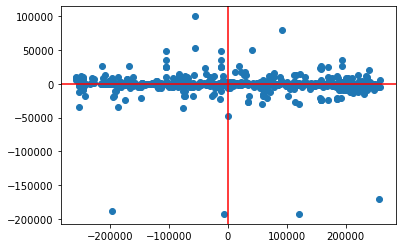

In [1015]:
panel = []

for file in os.listdir(f'{WD}tweet/csv'):
    if re.search('txn', file) != None:
        panel.append(pd.read_csv(f'{WD}tweet/csv/{file}'))
        
panel = pd.concat(panel)

time = pd.to_timedelta(panel['time_delta']).dt.total_seconds()
buy = panel['buy']

fig, ax = plt.subplots()

ax.scatter(time, buy)
ax.axhline(y=0, color='r')
ax.axvline(x=0, color='r')

plt.show()

In [1016]:
print('buy before')
num1 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0)].shape[0]
amo1 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num1}')
print(f'Aggregate Dollar Amount: {amo1}')
print(f'Average Dollar Amount: {amo1/num1}')
print('\nsell before')
num2 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0)].shape[0]
amo2 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num2}')
print(f'Aggregate Dollar Amount: {amo2}')
print(f'Average Dollar Amount: {amo2/num2}')
print('\nbuy after')
num3 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0)].shape[0]
amo3 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num3}')
print(f'Aggregate Dollar Amount: {amo3}')
print(f'Average Dollar Amount: {amo3/num3}')
print('\nsell after')
num4 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0)].shape[0]
amo4 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num4}')
print(f'Aggregate Dollar Amount: {amo4}')
print(f'Average Dollar Amount: {amo4/num4}')

panel.shape[0]

buy before
Aggregate Frenquency: 162
Aggregate Dollar Amount: 1010511.6295791777
Average Dollar Amount: 6237.726108513442

sell before
Aggregate Frenquency: 161
Aggregate Dollar Amount: -1064722.684538256
Average Dollar Amount: -6613.184376014012

buy after
Aggregate Frenquency: 191
Aggregate Dollar Amount: 898751.8259276927
Average Dollar Amount: 4705.506942029805

sell after
Aggregate Frenquency: 181
Aggregate Dollar Amount: -1347362.9028618103
Average Dollar Amount: -7443.993938463041


695

In [64]:
lst = pd.read_csv(f'{WD}tweet/list/list.csv')

for idx, row in panel.iterrows():
    insider_tokenSymbol = row['insider_tokenSymbol']
    event = row['event']
    
    index = lst.loc[lst['insider_tokenSymbol'] == insider_tokenSymbol, 'index'].values[0]
    tweet = pd.read_csv(f'{WD}tweet/csv/tweet_{index}.csv')
    panel.loc[panel['insider_tokenSymbol'] == insider_tokenSymbol, 'text'] = tweet.loc[tweet['timestamp'] == event, 'text'].values[0]
    
panel['insider_tokenSymbol'].nunique()

62

In [1000]:
# panel['transaction_id'].nunique()
# txn_id = panel.loc[:, ['transaction_id', 'dex']]
txn_id.iloc[695]

IndexError: single positional indexer is out-of-bounds

In [997]:
panel.loc[panel['transaction_id'] == '0x6f3b04852bcee5f19b08cbba8fff01f89366a07503863e1d6217de9721ec0a24']
panel = panel.loc[panel['transaction_id']!= '0x6f3b04852bcee5f19b08cbba8fff01f89366a07503863e1d6217de9721ec0a24']

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta


In [1011]:
# save = panel.copy()
save.to_csv(f'{RES}/insider_trading/token_related_txn/no_lp.csv', index=False)
save.shape[0]

548

In [1010]:
print('buy before')
num1 = save.loc[(save['buy'] > 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() < 0)].shape[0]
amo1 = save.loc[(save['buy'] > 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num1}')
print(f'Aggregate Dollar Amount: {amo1}')
print(f'Average Dollar Amount: {amo1/num1}')
print('\nsell before')
num2 = save.loc[(save['buy'] < 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() < 0)].shape[0]
amo2 = save.loc[(save['buy'] < 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num2}')
print(f'Aggregate Dollar Amount: {amo2}')
print(f'Average Dollar Amount: {amo2/num2}')
print('\nbuy after')
num3 = save.loc[(save['buy'] > 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() > 0)].shape[0]
amo3 = save.loc[(save['buy'] > 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num3}')
print(f'Aggregate Dollar Amount: {amo3}')
print(f'Average Dollar Amount: {amo3/num3}')
print('\nsell after')
num4 = save.loc[(save['buy'] < 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() > 0)].shape[0]
amo4 = save.loc[(save['buy'] < 0)&(pd.to_timedelta(save['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num4}')
print(f'Aggregate Dollar Amount: {amo4}')
print(f'Average Dollar Amount: {amo4/num4}')

buy before
Aggregate Frenquency: 162
Aggregate Dollar Amount: 1010511.6295791777
Average Dollar Amount: 6237.726108513442

sell before
Aggregate Frenquency: 67
Aggregate Dollar Amount: -523236.7115746077
Average Dollar Amount: -7809.503157829966

buy after
Aggregate Frenquency: 191
Aggregate Dollar Amount: 898751.8259276927
Average Dollar Amount: 4705.506942029805

sell after
Aggregate Frenquency: 128
Aggregate Dollar Amount: -1193134.8005783202
Average Dollar Amount: -9321.365629518126


In [1082]:
swap = list(save['id'].unique())

lp = panel.loc[[False if i in swap else True for i in panel['id']]]
lp.loc[lp['chain'] == 'fantom']

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta


In [1083]:
df.loc[df['chain'] == 'fantom']

,id,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,amount0Out,amount0In,amount1Out,amount1In,from,to,contract,buy,event,time_delta,text


# Excude LP

In [1091]:
panel['lp'] = np.nan
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}

for idx, row in panel.drop_duplicates('transaction_id').iterrows():
    try:
        transaction_id = row['transaction_id']
        chain = row['chain']
    
        if chain == 'ethereum': url = f'https://etherscan.io/tx/{transaction_id}'
        if chain == 'binance' : url = f'https://bscscan.com/tx/{transaction_id}'
        if chain == 'avalanche': url = f'https://snowtrace.io/tx/{transaction_id}'
        if chain == 'polygon' : url = f'https://polygonscan.com/tx/{transaction_id}'
        if chain == 'fantom' : url = f'https://ftmscan.com/tx/{transaction_id}'

        r = requests.get(url, headers=headers)
        if r.status_code != 200 : continue
        if re.search('supply', r.text.lower()) != None:
            panel.loc[panel['transaction_id'] == transaction_id, 'lp'] = True
            print(f'{chain}:{transaction_id}:lp')
        else:
            panel.loc[panel['transaction_id'] == transaction_id, 'lp'] = False
            print(f'{chain}:{transaction_id}:normal')
        
        time.sleep(2 + random.random() * 2)
    except Exception as e:
        print(f'{chain}:{transaction_id}:error{e}')
        time.sleep(5)

ethereum:0x1311567736a3602cba6c680dcff73b07379c3b9678203e7415df34f507de441e:lp
ethereum:0x211664420e2e90ecd044edd370d27e5026e90a095acf779ca678c2921f581e16:lp
ethereum:0x75061a9304271dcda58d1ffae826ea127a191ec68ef2994539e55b2c18810ac5:lp
ethereum:0xf7be0b0619098c74989cd0d5eeaaae74f1d2e6c1c3e0a0959496e73dea919611:lp
ethereum:0x3858caba20ec37f380298df11af4b4eca0cde337774971c80f82e046d700ac15:lp
ethereum:0x572a8cb6af8441752cc863c14ddc5474a00a4e4cf675829becf4e090bbae1e62:lp
ethereum:0x20fa7ec9e709406ce1e12d44a7bce4a3540d6a7665091c5dea6c0a784d1c4241:lp
ethereum:0x6fa34ffed7380fdb6696fa1072ac6814b7501ff2410007df93f3d55b67e2f2ac:lp
ethereum:0x28d19c20542e5c7ad8312e03db888a6957cf26bb463b7164e2779ca079f3be05:lp
ethereum:0xa2bcacd531f48414c2b96652e0aa3219bfc2ce2b0580fc5e9eb325102ca41be8:lp
ethereum:0x4704fe91c6acfa00331e64dda6445a4657fa05ddf3718d89f6fc6d8b6c9d727f:lp
ethereum:0x02b93957bef165b2236815f8198e08d2a52ef6d220cad65faeddfc878ff9daa1:lp
ethereum:0xcd7bcb3a10542a72d235e4443f2b0436cea46b7b3

In [1092]:
print('buy before')
num1 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0)].shape[0]
amo1 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num1}')
print(f'Aggregate Dollar Amount: {amo1}')
print(f'Average Dollar Amount: {amo1/num1}')
print('\nsell before')
num2 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0)].shape[0]
amo2 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num2}')
print(f'Aggregate Dollar Amount: {amo2}')
print(f'Average Dollar Amount: {amo2/num2}')
print('\nbuy after')
num3 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0)].shape[0]
amo3 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num3}')
print(f'Aggregate Dollar Amount: {amo3}')
print(f'Average Dollar Amount: {amo3/num3}')
print('\nsell after')
num4 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0)].shape[0]
amo4 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num4}')
print(f'Aggregate Dollar Amount: {amo4}')
print(f'Average Dollar Amount: {amo4/num4}')

panel.shape[0]

buy before
Aggregate Frenquency: 162
Aggregate Dollar Amount: 1010511.6295791777
Average Dollar Amount: 6237.726108513442

sell before
Aggregate Frenquency: 161
Aggregate Dollar Amount: -1064722.684538256
Average Dollar Amount: -6613.184376014012

buy after
Aggregate Frenquency: 191
Aggregate Dollar Amount: 898751.8259276927
Average Dollar Amount: 4705.506942029805

sell after
Aggregate Frenquency: 181
Aggregate Dollar Amount: -1347362.9028618103
Average Dollar Amount: -7443.993938463041


695

In [1093]:
panel = panel.loc[panel['lp'] == False]

print('buy before')
num1 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0)].shape[0]
amo1 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num1}')
print(f'Aggregate Dollar Amount: {amo1}')
print(f'Average Dollar Amount: {amo1/num1}')
print('\nsell before')
num2 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0)].shape[0]
amo2 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() < 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num2}')
print(f'Aggregate Dollar Amount: {amo2}')
print(f'Average Dollar Amount: {amo2/num2}')
print('\nbuy after')
num3 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0)].shape[0]
amo3 = panel.loc[(panel['buy'] > 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num3}')
print(f'Aggregate Dollar Amount: {amo3}')
print(f'Average Dollar Amount: {amo3/num3}')
print('\nsell after')
num4 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0)].shape[0]
amo4 = panel.loc[(panel['buy'] < 0)&(pd.to_timedelta(panel['time_delta']).dt.total_seconds() > 0), 'buy'].sum()
print(f'Aggregate Frenquency: {num4}')
print(f'Aggregate Dollar Amount: {amo4}')
print(f'Average Dollar Amount: {amo4/num4}')

panel.shape[0]

buy before
Aggregate Frenquency: 162
Aggregate Dollar Amount: 1010511.6295791777
Average Dollar Amount: 6237.726108513442

sell before
Aggregate Frenquency: 58
Aggregate Dollar Amount: -517116.9573178449
Average Dollar Amount: -8915.80960892836

buy after
Aggregate Frenquency: 191
Aggregate Dollar Amount: 898751.8259276927
Average Dollar Amount: 4705.506942029805

sell after
Aggregate Frenquency: 120
Aggregate Dollar Amount: -1170872.8191546646
Average Dollar Amount: -9757.273492955539


531

In [1096]:
panel.to_csv(f'{RES}/insider_trading/token_related_txn/no_lp.csv', index=False)
panel.shape[0]

531